### Loading the Data and Importing Libraries
---

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
advert = pd.read_csv("Advertising.csv")
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Remove the index column

In [10]:
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
advert.drop(['Unnamed: 0'], axis = 1, inplace = True)
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Exploratory Data Analysis

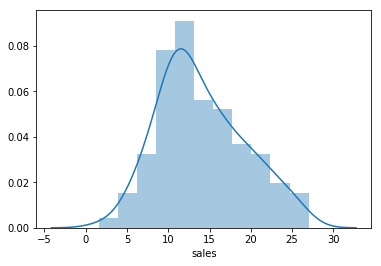

In [12]:
import seaborn as sns
sns.distplot(advert.sales)

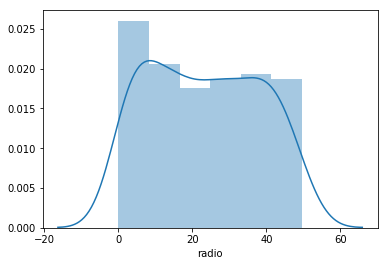

In [13]:
sns.distplot(advert.radio)

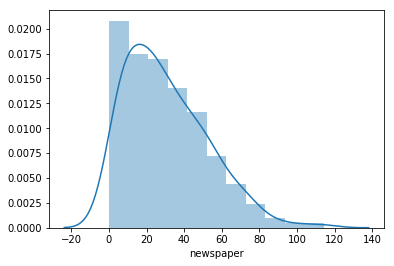

In [14]:
sns.distplot(advert.newspaper)

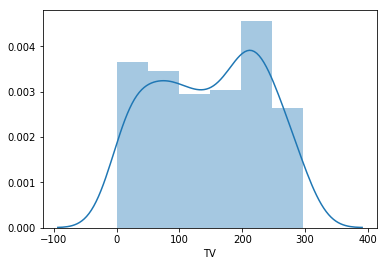

In [15]:
sns.distplot(advert.TV)

### Exploring Relationships between Predictors and Response

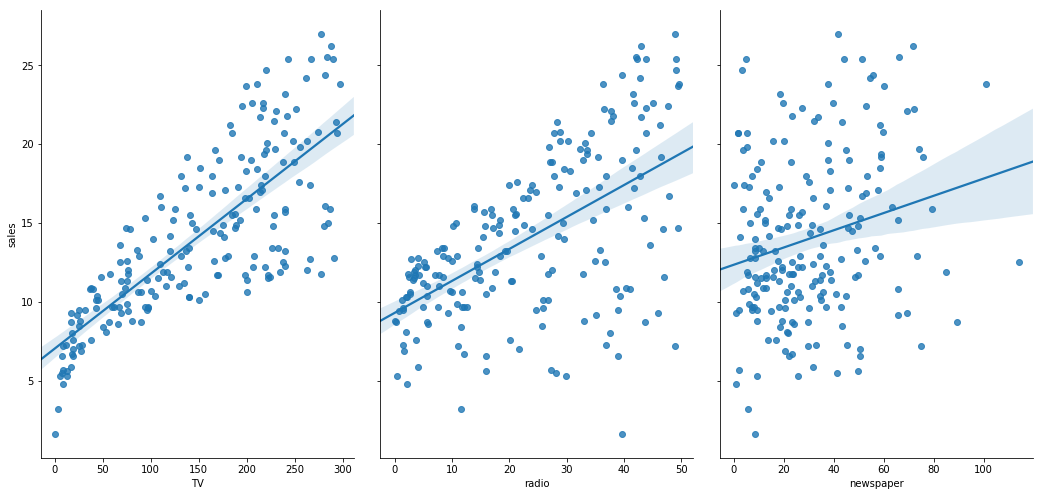

In [16]:
sns.pairplot(advert, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', height =7, 
            aspect = 0.7, kind = 'reg')

In [17]:
advert.TV.corr(advert.sales)

0.7822244248616061

In [18]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


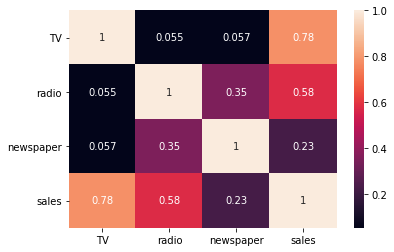

In [19]:
sns.heatmap(advert.corr(), annot = True)

### Creating the Simple Linear Regression Model

In [20]:
x = advert[['TV']]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [21]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [22]:
y = advert.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [27]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(150, 1) (150,) (50, 1) (50,)


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lf = LinearRegression()
lf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpreting Model Coefficients

In [30]:
print(lf.intercept_)
print(lf.coef_)

6.91197261886872
[0.04802945]


### Making Predictions with our Model

In [31]:
y_pred = lf.predict(x_test)
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

In [32]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

2.4643080986027908


In [33]:
print(metrics.mean_squared_error(y_test, y_pred))

10.310069587813155


In [35]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.210929707703542
